# Random Forest

In [3]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

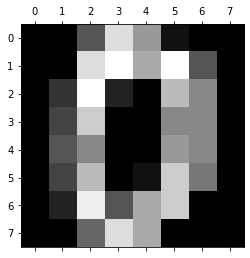

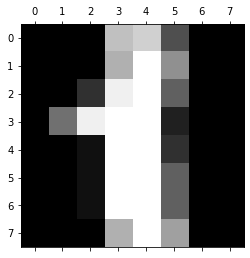

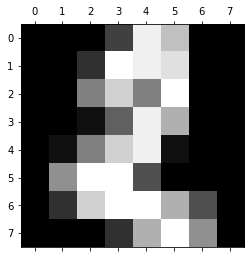

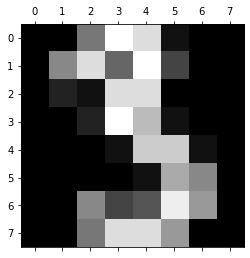

In [6]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i])

In [7]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target'] = digits.target

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
X = df.drop('target',axis='columns')
y = df.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
len(X_train)

1437

In [15]:
#ensemble used for using multiple algorithum
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model

RandomForestClassifier()

In [16]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
model.score(X_test,y_test)

0.9805555555555555

In [18]:
#change of no. of decision tree

model1= RandomForestClassifier(n_estimators=15)

In [20]:
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15)

In [21]:
model1.score(X_test,y_test)

1.0

# Confusion Matrix

In [22]:
y_predicted = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [25]:
cm= confusion_matrix(y_test,y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38]], dtype=int64)

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(69.0, 0.5, 'Truth')

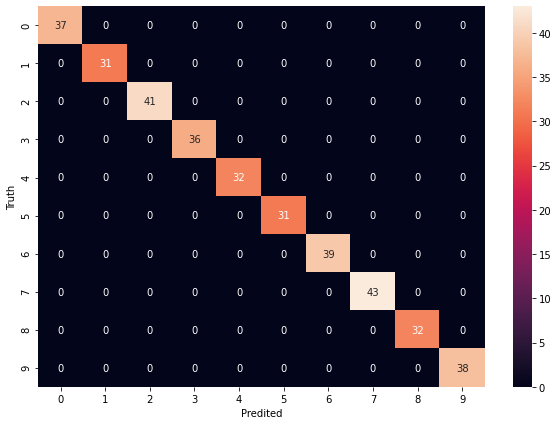

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)

plt.xlabel('Predited')
plt.ylabel('Truth')